In [5]:
!pip install matplotlib 

  Using cached matplotlib-3.10.6-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.0-cp313-cp313-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.0-cp313-cp

In [126]:
# Generate a random dataset
from datetime import datetime
import random
from reprolab.experiment import persistio

datetime_of_data_retrieval = datetime.strptime('23/09/25 15:16:26', '%d/%m/%y %H:%M:%S')

'''
When a function with persistio decorator is run, it checks whether the function has been run previously.
If the function has been run previously, the same output will be given as the previous times the function was run.
Thus the result of the function will always be the same.
'''
@persistio()
def get_dummy_data(datetime):
    random_integers = [random.randint(0, 100) for _ in range(10)]
    correlated_integers = [x + random.randint(-50, 50) for x in random_integers]
    return random_integers, correlated_integers, datetime

latest_random_integers, latest_correlated_integers, latest_time_retrieval = get_dummy_data(datetime.now())
cached_random_integers, cached_correlated_integers, cached_time_retrieval = get_dummy_data(datetime_of_data_retrieval)

✅ Hash written to persistio_hashes.yaml
[upload_to_cloud] Uploading reprolab_data/19ad3127fc1e391e4cefcd9fa1baf2f3.pickle.pkl.gz to s3://https://scruffy.lab.uvalight.net:9001/browser/naa-vre-user-data/a29lbi5ncmV1ZWxsQGxpZmV3YXRjaC5ldS9SZXByb2xhYi8=/19ad3127fc1e391e4cefcd9fa1baf2f3.pickle.pkl.gz


Text(0, 0.5, 'correlated_integers')

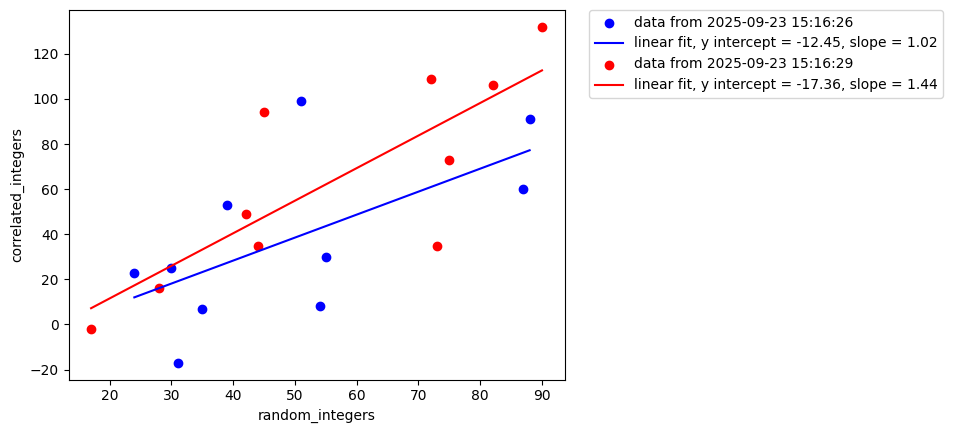

In [127]:
# Print the data
import matplotlib.pyplot as plt
import numpy as np

def get_linear_fit(x_array, y_array):
    slope, y_intercept = np.polyfit(x_array, y_array, 1)
    return slope, y_intercept

def plot_linear_fit(x_array, y_array, color):
    slope, y_intercept = get_linear_fit(x_array, y_array)
    minimum_x = min(x_array)
    maximum_x = max(x_array)
    linear_fit_x = [minimum_x, maximum_x]
    linear_fit_y = [y_intercept + minimum_x*slope, y_intercept + maximum_x*slope]
    label = f"linear fit, y intercept = {y_intercept:.2f}, slope = {slope:.2f}"
    plt.plot(linear_fit_x, linear_fit_y, color, label=label)

def plot_data_and_linear_fit(x_array, y_array, datetime, color):
    plt.scatter(x_array, y_array, color=color, label=f"data from {datetime.strftime("%Y-%m-%d %H:%M:%S")}")
    plot_linear_fit(x_array, y_array, color)

plot_data_and_linear_fit(cached_random_integers, cached_correlated_integers, cached_time_retrieval, "blue")
plot_data_and_linear_fit(latest_random_integers, latest_correlated_integers, latest_time_retrieval, "red")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("random_integers")
plt.ylabel("correlated_integers")